# DS-SF-36 | Unit Project | 3 | Machine Learning Modeling and Executive Summary | Starter Code

In this project, you will perform a logistic regression on the admissions data we've been working with in Unit Project 1 and 2.  You will summarize and present your findings and the methods you used.

In [104]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

import statsmodels.formula.api as smf

from sklearn import linear_model

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")
from IPython.display import Image
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.datasets import make_classification;

/Users/jacobwhite/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [89]:
df = pd.read_csv(os.path.join('..', '..', 'dataset', 'dataset-ucla-admissions.csv'))
df.dropna(inplace = True)

df

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
...,...,...,...,...
395,0,620.0,4.00,2.0
396,0,560.0,3.04,3.0
397,0,460.0,2.63,2.0
398,0,700.0,3.65,2.0


## Part A.  Frequency Table

> ### Question 1.  Create a frequency table for `prestige` and whether an applicant was admitted.

In [90]:
pd.crosstab(index = df.admit, columns = df.prestige)

prestige,1.0,2.0,3.0,4.0
admit,,,,
0,28,95,93,55
1,33,53,28,12


## Part B.  Feature Engineering

> ### Question 2.  Create a one-hot encoding for `prestige`.

In [91]:
prestige_columns = pd.get_dummies(data = df, columns = ['prestige'])
print(prestige_columns)

     admit    gre   gpa  prestige_1.0  prestige_2.0  prestige_3.0  \
0        0  380.0  3.61             0             0             1   
1        1  660.0  3.67             0             0             1   
2        1  800.0  4.00             1             0             0   
3        1  640.0  3.19             0             0             0   
4        0  520.0  2.93             0             0             0   
..     ...    ...   ...           ...           ...           ...   
395      0  620.0  4.00             0             1             0   
396      0  560.0  3.04             0             0             1   
397      0  460.0  2.63             0             1             0   
398      0  700.0  3.65             0             1             0   
399      0  600.0  3.89             0             0             1   

     prestige_4.0  
0               0  
1               0  
2               0  
3               1  
4               1  
..            ...  
395             0  
396        

In [92]:
prestige_columns = prestige_columns.drop(["admit", "gre", "gpa"], axis = 1)

> ### Question 3.  How many of these binary variables do we need for modeling?

We need all four of the prestige binary variables.

> ### Question 4.  Why are we doing this?

I am unsure - it seems that Prestige is an ordinal variable, not categorical. I.E. 1 > 4. 2 > 3. Because of this, I am unsure why it could not included in the model.

> ### Question 5.  Add all these binary variables in the dataset and remove the now redundant `prestige` feature.

In [93]:
df = pd.concat([df, prestige_columns], axis=1, join = "inner")
df = df.drop("prestige", axis = 1)
print(df)

     admit    gre   gpa  prestige_1.0  prestige_2.0  prestige_3.0  \
0        0  380.0  3.61             0             0             1   
1        1  660.0  3.67             0             0             1   
2        1  800.0  4.00             1             0             0   
3        1  640.0  3.19             0             0             0   
4        0  520.0  2.93             0             0             0   
..     ...    ...   ...           ...           ...           ...   
395      0  620.0  4.00             0             1             0   
396      0  560.0  3.04             0             0             1   
397      0  460.0  2.63             0             1             0   
398      0  700.0  3.65             0             1             0   
399      0  600.0  3.89             0             0             1   

     prestige_4.0  
0               0  
1               0  
2               0  
3               1  
4               1  
..            ...  
395             0  
396        

In [94]:
df.columns


Index(['admit', 'gre', 'gpa', 'prestige_1.0', 'prestige_2.0', 'prestige_3.0',
       'prestige_4.0'],
      dtype='object')

In [95]:
df

,admit,gre,gpa,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,0,0,1,0
1,1,660.0,3.67,0,0,1,0
2,1,800.0,4.00,1,0,0,0
3,1,640.0,3.19,0,0,0,1
4,0,520.0,2.93,0,0,0,1
...,...,...,...,...,...,...,...
395,0,620.0,4.00,0,1,0,0
396,0,560.0,3.04,0,0,1,0
397,0,460.0,2.63,0,1,0,0
398,0,700.0,3.65,0,1,0,0


In [96]:
print(df)

     admit    gre   gpa  prestige_1.0  prestige_2.0  prestige_3.0  \
0        0  380.0  3.61             0             0             1   
1        1  660.0  3.67             0             0             1   
2        1  800.0  4.00             1             0             0   
3        1  640.0  3.19             0             0             0   
4        0  520.0  2.93             0             0             0   
..     ...    ...   ...           ...           ...           ...   
395      0  620.0  4.00             0             1             0   
396      0  560.0  3.04             0             0             1   
397      0  460.0  2.63             0             1             0   
398      0  700.0  3.65             0             1             0   
399      0  600.0  3.89             0             0             1   

     prestige_4.0  
0               0  
1               0  
2               0  
3               1  
4               1  
..            ...  
395             0  
396        

## Part C.  Hand calculating odds ratios

Let's develop our intuition about expected outcomes by hand calculating odds ratios.

> ### Question 6.  Create a frequency table for `prestige = 1` and whether an applicant was admitted.

In [97]:
pd.crosstab(index = df.admit, columns = df['prestige_1.0'])

prestige_1.0,0,1
admit,,
0,243,28
1,93,33


> ### Question 7.  Use the frequency table above to calculate the odds of being admitted to graduate school for applicants that attended the most prestigious undergraduate schools.

In [98]:
295 / (33 + 295)

0.899390243902439

> ### Question 8.  Now calculate the odds of admission for undergraduates who did not attend a #1 ranked college.

In [99]:
(867) / (770 + 867)

0.529627367135003

> ### Question 9.  Finally, what's the odds ratio?

In [100]:
0.89939 / 0.52962

1.6981798270458066

> ### Question 10.  Write this finding in a sentence.

An undergraduate who attended one of the most prestigous undergraduate instutions has is 1.6x more likely to be admitted to UCLA than an undergraduate who did not.

> ### Question 11.  Use the frequency table above to calculate the odds of being admitted to graduate school for applicants that attended the least prestigious undergraduate schools.  Then calculate their odds ratio of being admitted to UCLA.  Finally, write this finding in a sentence.

In [101]:
pd.crosstab(index = df.admit, columns = df['prestige_4.0'])

prestige_4.0,0,1
admit,,
0,216,55
1,114,12


In [31]:
(13/325) / (1149 / (491 + 1149))

0.05709312445604874

## Part D. Analysis using `statsmodels`

> ### Question 12.  Fit a logistic regression model predicting admission into UCLA using `gre`, `gpa`, and the `prestige` of the undergraduate schools.  Use the highest prestige undergraduate schools as your reference point.

In [118]:
linreg = LinearRegression()

y = df.admit
X = df[["prestige_1.0"]]

linreg.fit(X, y)

pred = linreg.predict(X);

> ### Question 13.  Print the model's summary results.

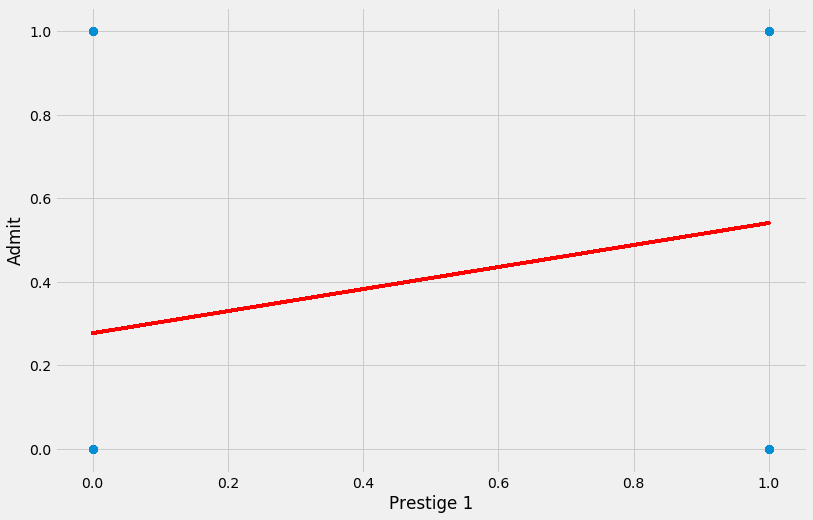

In [120]:
plt.figure(figsize=(12,8))
plt.xlabel("Prestige 1")
plt.ylabel("Admit")
plt.scatter(X,y, s=60)
plt.plot(X, pred, c="r", linewidth=3);

# How do I plot this 

> ### Question 14.  What are the odds ratios of the different features and their 95% confidence intervals?

In [124]:
# I am unsure how to complete this question - would you be able to point me to resources which could help me? 
# In particular, how is an odds ratio calculated.

AttributeError: 'DataFrame' object has no attribute 'coef'

> ### Question 15.  Interpret the odds ratio for `prestige = 2`.

Answer: TODO

> ### Question 16.  Interpret the odds ratio of `gpa`.

Answer: TODO

> ### Question 17.  Assuming a student with a GRE of 800 and a GPA of 4.  What is his/her probability of admission  if he/she come from a tier-1, tier-2, tier-3, or tier-4 undergraduate school?

In [ ]:
# TODO

Answer: TODO

## Part E. Moving the model from `statsmodels` to `sklearn`

> ### Question 18.  Let's assume we are satisfied with our model.  Remodel it (same features) using `sklearn`.  When creating the logistic regression model with `LogisticRegression(C = 10 ** 2)`.

In [ ]:
# TODO

> ### Question 19.  What are the odds ratios for the different variables and how do they compare with the odds ratios calculated with `statsmodels`?

In [ ]:
# TODO

Answer: TODO

> ### Question 20.  Again, assuming a student with a GRE of 800 and a GPA of 4.  What is his/her probability of admission  if he/she come from a tier-1, tier-2, tier-3, or tier-4 undergraduate school?

In [ ]:
# TODO

Answer: TODO

## Part F.  Executive Summary

> ## Question 21.  Introduction
>
> Write a problem statement for this project.

Answer: TODO

> ## Question 22.  Dataset
>
> Write up a description of your data and any cleaning that was completed.

Answer: TODO

> ## Question 23.  Demo
>
> Provide a table that explains the data by admission status.

Answer: TODO

> ## Question 24.  Methods
>
> Write up the methods used in your analysis.

Answer: TODO

> ## Question 25.  Results
>
> Write up your results.

Answer: TODO

> ## Question 26.  Visuals
>
> Provide a table or visualization of these results.

Answer: TODO

> ## Question 27.  Discussion
>
> Write up your discussion and future steps.

Answer: TODO